In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
air = np.transpose(np.loadtxt('air.csv', delimiter = ','))
nitrogen = np.transpose(np.loadtxt('nitrogen.csv', delimiter = ','))
argon = np.transpose(np.loadtxt('argon.csv', delimiter = ','))
co2 = np.transpose(np.loadtxt('co2.csv', delimiter = ','))

In [3]:
H = 101.5 #kPa

P0_air = air[0]
P1_air = air[1]

P0_nit = nitrogen[0]
P1_nit = nitrogen[1]

P0_arg = argon[0]
P1_arg = argon[1]

P0_co2 = co2[0]
P1_co2 = co2[1]

In [4]:
#defining useful function to do least-square fitting with non-zero intercept
def delta(x):
    return len(x)*sum(i*i for i in x)-(sum(x))**2
def intercept(x,y,delta):
    return ((sum(i*i for i in x))*sum(y)-sum(x)*sum(map(lambda a,b:a*b,x,y)))/delta
def slope(x,y,delta):
    return (len(x)*sum(map(lambda a,b:a*b,x,y))-sum(x)*sum(y))/delta
def acu(x,y,m,c):
    return np.sqrt((1/(len(x)-2))*sum(map(lambda a,b:(b-m*a-c)**2, x,y)))
def acu_0 (x,y,m):
    return np.sqrt((1/(len(x)-2))*sum(map(lambda a,b:(b-m*a)**2, x,y)))
def am(acu,x,delta):
    return acu*np.sqrt(len(x)/delta)
def ac(acu,x,delta):
    return acu*np.sqrt(sum(i*i for i in x)/delta)

# 1. Air

In [5]:
x_air = np.log(P0_air / P1_air)
y_air = np.log(P0_air / H)

In [6]:
#calculating parameters and their errors
dx_air = delta(x_air)
m_air = slope(x_air,y_air,dx_air)
print('slope with non-zero intercept:',m_air)
c_air = intercept(x_air,y_air,dx_air)
print('intercept:',c_air)
cu_air = acu(x_air,y_air,m_air,c_air)
merr_air = am(cu_air,x_air,dx_air)
print ('uncertainty in the slope with non-zero intercept:', merr_air)
cerr_air = ac(cu_air,x_air,dx_air)

lin_air = np.linspace(x_air.min(),x_air.max(),10)
fit_air = np.polyval([m_air,c_air], x_air)
fitlin_air = np.polyval([m_air,c_air], lin_air)
res_air = y_air - fit_air


m_air_0 = sum(x_air*y_air)/sum(x_air**2)
fitlin_air_0 = np.polyval([m_air_0,0], lin_air)
cu_air_0 = acu_0(x_air,y_air,m_air_0)
merr_air_0 = am(cu_air_0,x_air,dx_air)

print ('slope with zero intercept',m_air_0)
print ('uncertainty in the slope with zero intercept',merr_air_0)

slope with non-zero intercept: 1.3745948253464157
intercept: -0.0021957568069531455
uncertainty in the slope with non-zero intercept: 0.012500526165383937
slope with zero intercept 1.3549796728796497
uncertainty in the slope with zero intercept 0.014310042764827337


In [7]:
# Measurements uncertainties
xerr_air = []
yerr_air = []
for i in range(len (P0_air)):
    xerr_air.append(abs(np.log ((P0_air[i]+0.01)/(P1_air[i]+0.01)) - np.log ((P0_air[i]-0.01)/(P1_air[i]-0.01)))/2)
    yerr_air.append(abs(np.log((P0_air[i]+0.01)/H) - np.log((P0_air[i]-0.01)/H))/2)
print (xerr_air, yerr_air)

[7.536990378649577e-06, 9.886326471593432e-06, 1.0214088738906557e-05, 9.951207065247991e-06, 1.006583866671601e-05, 1.0252495545017004e-05, 1.1012348810179873e-05, 1.0169314777631888e-05, 9.978117258661878e-06, 1.0342874319627104e-05] [8.823010434051703e-05, 8.488243802752538e-05, 8.443806488027394e-05, 8.474576291478408e-05, 8.455944549162764e-05, 8.427439763761257e-05, 8.329168768224371e-05, 8.443806488027394e-05, 8.474576291478408e-05, 8.417508437393029e-05]


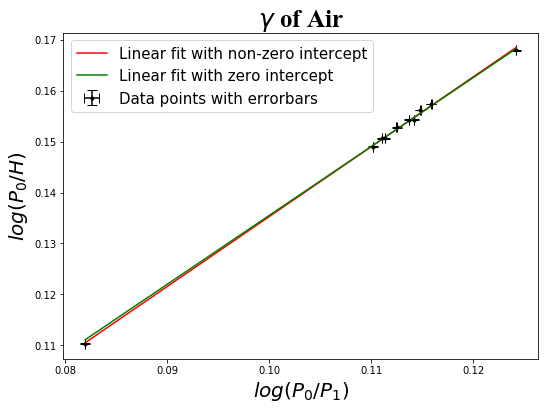

In [8]:
plt.figure (figsize=(8.5,6))

plt.xlabel('$log (P_0/P_1)$', fontname = 'Times New Roman', fontsize = 20)
plt.ylabel('$log (P_0/H)$', fontname = 'Times New Roman', fontsize = 20)
plt.title('$\gamma$ of Air', fontname = 'Times New Roman', fontsize = '25')

plt.errorbar(x_air, y_air, yerr = yerr_air, xerr = xerr_air, fmt = 'k.', capsize = 5, label = "Data points with errorbars")

plt.plot(lin_air, fitlin_air, 'r', label = "Linear fit with non-zero intercept")
plt.plot(lin_air, fitlin_air_0, 'g', label = "Linear fit with zero intercept")

plt.legend(loc = 2, prop={'size':15})
plt.savefig('air.png')
plt.show()

In [9]:
# Class data - weighted mean
class_air = [1.35,1.24,1.34,5,3.94,1.35,6,1.351179,1.25]
stdev_air = [0.0018,0.07,0.02,3,1.92,0.004,3,0.015582,0.01]
ste_air = stdev_air/np.sqrt(10)
weights_air = 1/ste_air**2
mean_air = sum (weights_air*class_air)/sum(weights_air)
error_air = np.sqrt(1/sum(weights_air))
print (mean_air)
print (error_air)

1.347316851272858
0.0005076958585882001


# 2. Nitrogen

In [10]:
x_nit = np.log(P0_nit / P1_nit)
y_nit = np.log(P0_nit / H)

In [11]:
dx_nit = delta(x_nit)
m_nit = slope(x_nit,y_nit,dx_nit)
print('slope with non-zero intercept:',m_nit)
c_nit = intercept(x_nit,y_nit,dx_nit)
print('intercept:',c_nit)
cu_nit = acu(x_nit,y_nit,m_nit,c_nit)
merr_nit = am(cu_nit,x_nit,dx_nit)
print ('uncertainty in the slope with non-zero intercept:', merr_nit)
cerr_nit = ac(cu_nit,x_nit,dx_nit)

lin_nit = np.linspace(x_nit.min(),x_nit.max(),10)
fit_nit = np.polyval([m_nit,c_nit], x_nit)
fitlin_nit = np.polyval([m_nit,c_nit], lin_nit)
res_nit = y_nit - fit_nit


m_nit_0 = sum(x_nit*y_nit)/sum(x_nit**2)
fitlin_nit_0 = np.polyval([m_nit_0,0], lin_nit)
cu_nit_0 = acu_0(x_nit,y_nit,m_nit_0)
merr_nit_0 = am(cu_nit_0,x_nit,dx_nit)

print ('slope with zero intercept',m_nit_0)
print ('uncertainty in the slope with zero intercept',merr_nit_0)


slope with non-zero intercept: 1.2953919540537684
intercept: 0.012506163981004183
uncertainty in the slope with non-zero intercept: 0.06832637785364233
slope with zero intercept 1.4284703169466746
uncertainty in the slope with zero intercept 0.08298887941116176


In [12]:
xerr_nit = []
yerr_nit = []
for i in range(len (P0_nit)):
    xerr_nit.append(abs(np.log ((P0_nit[i]+0.01)/(P1_nit[i]+0.01)) - np.log ((P0_nit[i]-0.01)/(P1_nit[i]-0.01)))/2)
    yerr_nit.append(abs(np.log((P0_nit[i]+0.01)/H) - np.log((P0_nit[i]-0.01)/H))/2)
print (xerr_nit, yerr_nit)

[8.333809921545754e-06, 8.956895257108966e-06, 8.667873481617294e-06, 8.096822195019504e-06, 7.811740796601074e-06, 8.860063932025763e-06, 8.856873005211319e-06, 8.187119011231203e-06, 8.708939882647038e-06, 8.214090477312586e-06] [8.640801887922767e-05, 8.554319952436273e-05, 8.585901970102616e-05, 8.675284137323047e-05, 8.685833427563017e-05, 8.563110142530139e-05, 8.561643856540291e-05, 8.66175835860794e-05, 8.58000860106678e-05, 8.66175835860794e-05]


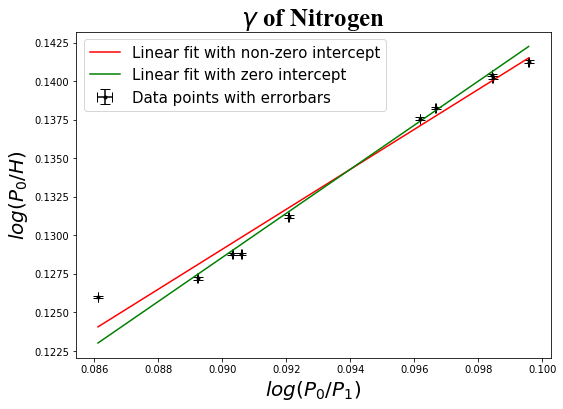

In [13]:
plt.figure (figsize=(8.5,6))

plt.xlabel('$log (P_0/P_1)$', fontname = 'Times New Roman', fontsize = 20)
plt.ylabel('$log (P_0/H)$', fontname = 'Times New Roman', fontsize = 20)
plt.title('$\gamma$ of Nitrogen', fontname = 'Times New Roman', fontsize = '25')

plt.errorbar(x_nit, y_nit, yerr = yerr_nit, xerr = xerr_nit, fmt = 'k.', capsize = 5, label = "Data points with errorbars")

plt.plot(lin_nit, fitlin_nit, 'r', label = "Linear fit with non-zero intercept")
plt.plot(lin_nit, fitlin_nit_0, 'g', label = "Linear fit with zero intercept")

plt.legend(loc = 2, prop={'size':15})
plt.savefig('n2.png')
plt.show()

In [14]:
# Class data - weighted mean
class_nit = [1.34,1.21,1.33,8,3.75,1.43,6,1.319432,1.32]
stdev_nit = [0.002,0.06,0.01,6,2.29,0.01,3,0.012459,0.02]
ste_nit = stdev_nit/np.sqrt(10)
weights_nit = 1/ste_nit**2
mean_nit = sum (weights_nit*class_nit)/sum(weights_nit)
error_nit = np.sqrt(1/sum(weights_nit))
print (mean_nit)
print (error_nit)

1.3420863391346447
0.0005984481189364766


# 3. Argon

In [15]:
x_arg = np.log(P0_arg / P1_arg)
y_arg = np.log(P0_arg / H)

In [16]:
dx_arg = delta(x_arg)
m_arg = slope(x_arg,y_arg,dx_arg)
print('slope with non-zero intercept:',m_arg)
c_arg = intercept(x_arg,y_arg,dx_arg)
print('intercept:',c_arg)
cu_arg = acu(x_arg,y_arg,m_arg,c_arg)
merr_arg = am(cu_arg,x_arg,dx_arg)
print ('uncertainty in the slope with non-zero intercept:', merr_arg)
cerr_arg = ac(cu_arg,x_arg,dx_arg)

lin_arg = np.linspace(x_arg.min(),x_arg.max(),10)
fit_arg = np.polyval([m_arg,c_arg], x_arg)
fitlin_arg = np.polyval([m_arg,c_arg], lin_arg)
res_arg = y_arg - fit_arg


m_arg_0 = sum(x_arg*y_arg)/sum(x_arg**2)
fitlin_arg_0 = np.polyval([m_arg_0,0], lin_arg)
cu_arg_0 = acu_0(x_arg,y_arg,m_arg_0)
merr_arg_0 = am(cu_arg_0,x_arg,dx_arg)

print ('slope with zero intercept',m_arg_0)
print ('uncertainty in the slope with zero intercept',merr_arg_0)

slope with non-zero intercept: 1.6037430606555643
intercept: -0.001166426705716237
uncertainty in the slope with non-zero intercept: 0.04079173149048498
slope with zero intercept 1.5899157987482733
uncertainty in the slope with zero intercept 0.04108967725036507


In [17]:
xerr_arg = []
yerr_arg = []
for i in range(len (P0_arg)):
    xerr_arg.append(abs(np.log ((P0_arg[i]+0.01)/(P1_arg[i]+0.01)) - np.log ((P0_arg[i]-0.01)/(P1_arg[i]-0.01)))/2)
    yerr_arg.append(abs(np.log((P0_arg[i]+0.01)/H) - np.log((P0_arg[i]-0.01)/H))/2)
print (xerr_arg, yerr_arg)

[6.974174696937341e-06, 5.079947394123069e-06, 8.16975249370161e-06, 7.3816739131621345e-06, 8.064030309548609e-06, 7.4080774905976865e-06, 6.594337116347382e-06, 7.716762967575896e-06, 8.111831886287169e-06, 8.792459755595228e-06] [8.726765010377141e-05, 9.028530179827632e-05, 8.494011742168905e-05, 8.679802122314728e-05, 8.523695895178152e-05, 8.640055317857276e-05, 8.778089910191356e-05, 8.588114071272912e-05, 8.538980466493706e-05, 8.411843896014015e-05]


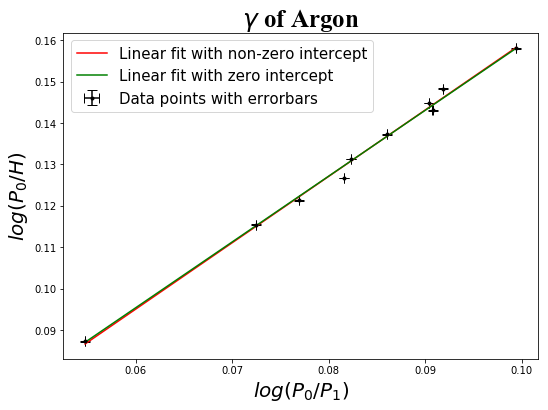

In [18]:
plt.figure (figsize=(8.5,6))

plt.xlabel('$log (P_0/P_1)$', fontname = 'Times New Roman', fontsize = 20)
plt.ylabel('$log (P_0/H)$', fontname = 'Times New Roman', fontsize = 20)
plt.title('$\gamma$ of Argon', fontname = 'Times New Roman', fontsize = '25')

plt.errorbar(x_arg, y_arg, yerr = yerr_arg, xerr = xerr_arg, fmt = 'k.', capsize = 5, label = "Data points with errorbars")

plt.plot(lin_arg, fitlin_arg, 'r', label = "Linear fit with non-zero intercept")
plt.plot(lin_arg, fitlin_arg_0, 'g', label = "Linear fit with zero intercept")

plt.legend(loc = 2, prop={'size':15})
plt.savefig('ar.png')
plt.show()

In [19]:
# Class data - weighted mean
class_arg = [1.544,1.19,1.55,5,4.77,1.59,4,1.5577,1.51]
stdev_arg = [0.02,0.04,0.02,5,2.5,0.02,2,0.006663,0.02]
ste_arg = stdev_arg/np.sqrt(10)
weights_arg = 1/ste_arg**2
mean_arg = sum (weights_arg*class_arg)/sum(weights_arg)
error_arg = np.sqrt(1/sum(weights_arg))
print (mean_arg)
print (error_arg)

1.5480303730471185
0.0017368279111471018


# 4. CO$_2$

In [20]:
x_co2 = np.log(P0_co2 / P1_co2)
y_co2 = np.log(P0_co2 / H)

In [21]:
dx_co2 = delta(x_co2)
m_co2 = slope(x_co2,y_co2,dx_co2)
print('slope with non-zero intercept:',m_co2)
c_co2 = intercept(x_co2,y_co2,dx_co2)
print('intercept:',c_co2)
cu_co2 = acu(x_co2,y_co2,m_co2,c_co2)
merr_co2 = am(cu_co2,x_co2,dx_co2)
print ('uncertainty in the slope with non-zero intercept:', merr_co2)
cerr_co2 = ac(cu_co2,x_co2,dx_co2)

lin_co2 = np.linspace(x_co2.min(),x_co2.max(),10)
fit_co2 = np.polyval([m_co2,c_co2], x_co2)
fitlin_co2 = np.polyval([m_co2,c_co2], lin_co2)
res_co2 = y_co2 - fit_co2


m_co2_0 = sum(x_co2*y_co2)/sum(x_co2**2)
fitlin_co2_0 = np.polyval([m_co2_0,0], lin_co2)
cu_co2_0 = acu_0(x_co2,y_co2,m_co2_0)
merr_co2_0 = am(cu_co2_0,x_co2,dx_co2)

print ('slope with zero intercept',m_co2_0)
print ('uncertainty in the slope with zero intercept',merr_co2_0)

slope with non-zero intercept: 1.26554362380121
intercept: 0.00014187760146202902
uncertainty in the slope with non-zero intercept: 0.006113636424911145
slope with zero intercept 1.2668402904574572
uncertainty in the slope with zero intercept 0.006132181957895346


In [22]:
xerr_co2 = []
yerr_co2 = []
for i in range(len (P0_co2)):
    xerr_co2.append(abs(np.log ((P0_co2[i]+0.01)/(P1_co2[i]+0.01)) - np.log ((P0_co2[i]-0.01)/(P1_co2[i]-0.01)))/2)
    yerr_co2.append(abs(np.log((P0_co2[i]+0.01)/H) - np.log((P0_co2[i]-0.01)/H))/2)
print (xerr_co2, yerr_co2)

[7.933019170132394e-06, 1.0449924166912317e-05, 1.0150492161534186e-05, 2.284258972045164e-06, 1.163304558624012e-05, 9.895490075365054e-06, 1.1445637316101487e-05, 9.292366586324818e-06, 9.703967478902342e-06, 8.999593293590458e-06] [8.837825917844266e-05, 8.507018310614789e-05, 8.547008567824643e-05, 9.562057783976674e-05, 8.360504993984441e-05, 8.580744829714271e-05, 8.373806752116908e-05, 8.664009725374566e-05, 8.596234870314468e-05, 8.689607251628761e-05]


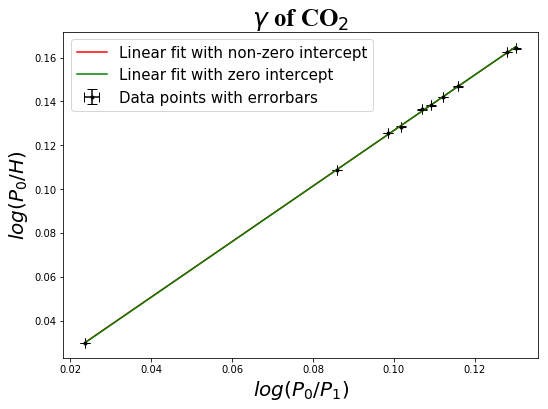

In [23]:
plt.figure (figsize=(8.5,6))

plt.xlabel('$log (P_0/P_1)$', fontname = 'Times New Roman', fontsize = 20)
plt.ylabel('$log (P_0/H)$', fontname = 'Times New Roman', fontsize = 20)
plt.title('$\gamma$ of CO$_2$', fontname = 'Times New Roman', fontsize = '25')

plt.errorbar(x_co2, y_co2, yerr = yerr_co2, xerr = xerr_co2, fmt = 'k.', capsize = 5, label = "Data points with errorbars")

plt.plot(lin_co2, fitlin_co2, 'r', label = "Linear fit with non-zero intercept")
plt.plot(lin_co2, fitlin_co2_0, 'g', label = "Linear fit with zero intercept")

plt.legend(loc = 2, prop={'size':15})
plt.savefig('co2.png')
plt.show()

In [24]:
# Class data - weighted mean
class_co2 = [1.265,1.51,1.25,5,2.09,1.27,6,1.234961,1.25]
stdev_co2 = [0.0014,0.06,0.02,4,0.65,0.0048,3,0.01168,0.009]
ste_co2 = stdev_co2/np.sqrt(10)
weights_co2 = 1/ste_co2**2
mean_co2 = sum (weights_co2*class_co2)/sum(weights_co2)
error_co2 = np.sqrt(1/sum(weights_co2))
print (mean_co2)
print (error_co2)

1.2647307679310769
0.0004166438707972548
